# Report on Pasadena ISD

In [1]:
import os
import sys

script_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))  # one level up
sys.path.append(script_dir)

from KNN_Diagnostic_Plots import plot_economically_disadvantaged_side_by_side, plot_language_education_bars, plot_gifted_talented_bars, plot_special_ed_504_bar, plot_race_ethnicity_stacked_bar, plot_student_teacher_ratio_bars, plot_student_staff_counts, plot_special_populations_bar

from getData import get_data

from compareNeighbors import comparePlotter, compareMetrics

from Demographic_Buckets import student_count
from Demographic_Buckets import staff_count
from Demographic_Buckets import race_ethnicity_percent
from Demographic_Buckets import economically_disadvantaged
from Demographic_Buckets import special_ed_504
from Demographic_Buckets import language_education_percent
from Demographic_Buckets import special_populations_percent
from Demographic_Buckets import gifted_students
from Demographic_Buckets import student_teacher_ratio

import pandas as pd

In [2]:
df = get_data("/Users/biancaschutz", 2023)
pasadenaISD = 101917

In [3]:
all_neighbors = compareMetrics(district_id = pasadenaISD, df = df)


In [4]:
pd.DataFrame({'Unique Neighbors': all_neighbors['DISTNAME'][all_neighbors['DISTRICT_id'] != pasadenaISD].unique()})

,Unique Neighbors
0,WEST OSO ISD
1,FERRIS ISD
2,LITTLEFIELD ISD
3,PLAINVIEW ISD
4,DEL VALLE ISD
5,MORTON ISD
6,LULING ISD
7,SAN ANTONIO ISD
8,CHANNELVIEW ISD
9,CORPUS CHRISTI ISD


## Student-Teacher Ratio

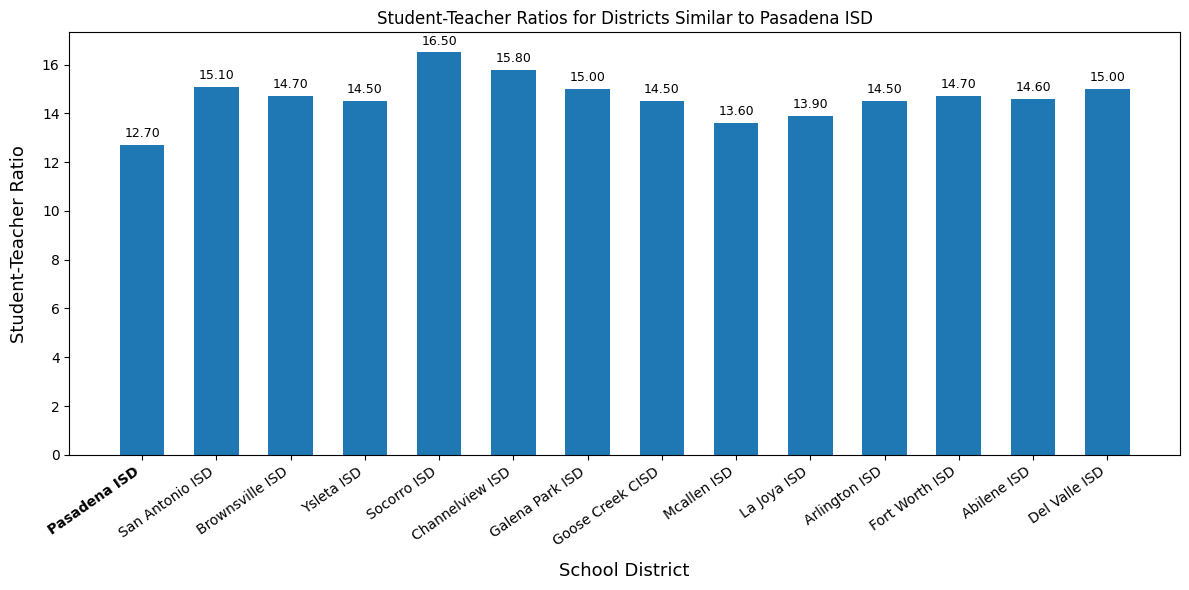

In [5]:
student_teacher_ratio_plot = comparePlotter(district_id = pasadenaISD, plot_func = plot_student_teacher_ratio_bars, df = df, selected_features= gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

## Staff/Student Count

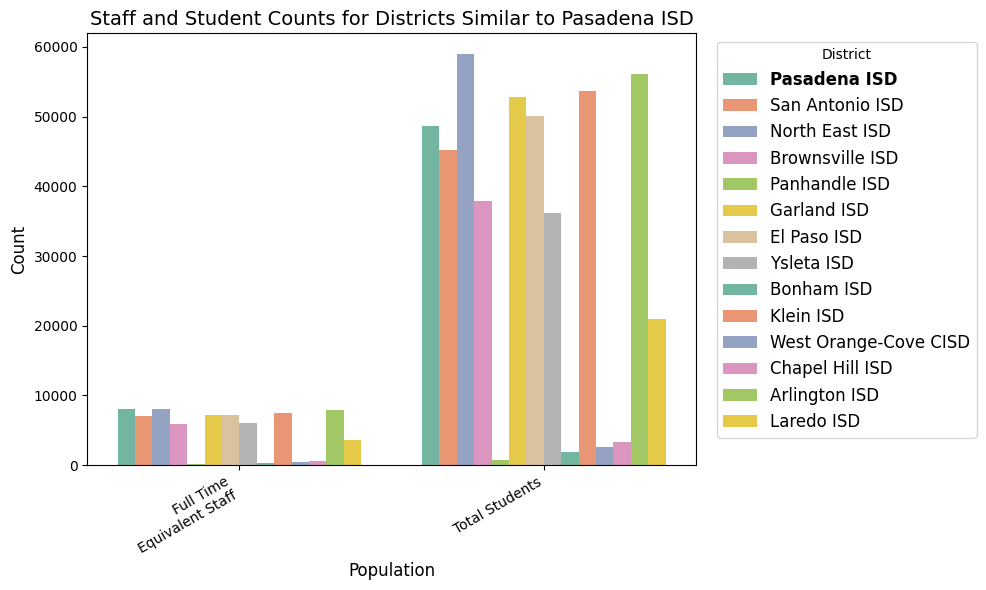

In [6]:
student_staff_count_plot = comparePlotter(district_id = pasadenaISD, plot_func = plot_student_staff_counts, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = staff_count + student_count)

## Race/Ethnicity

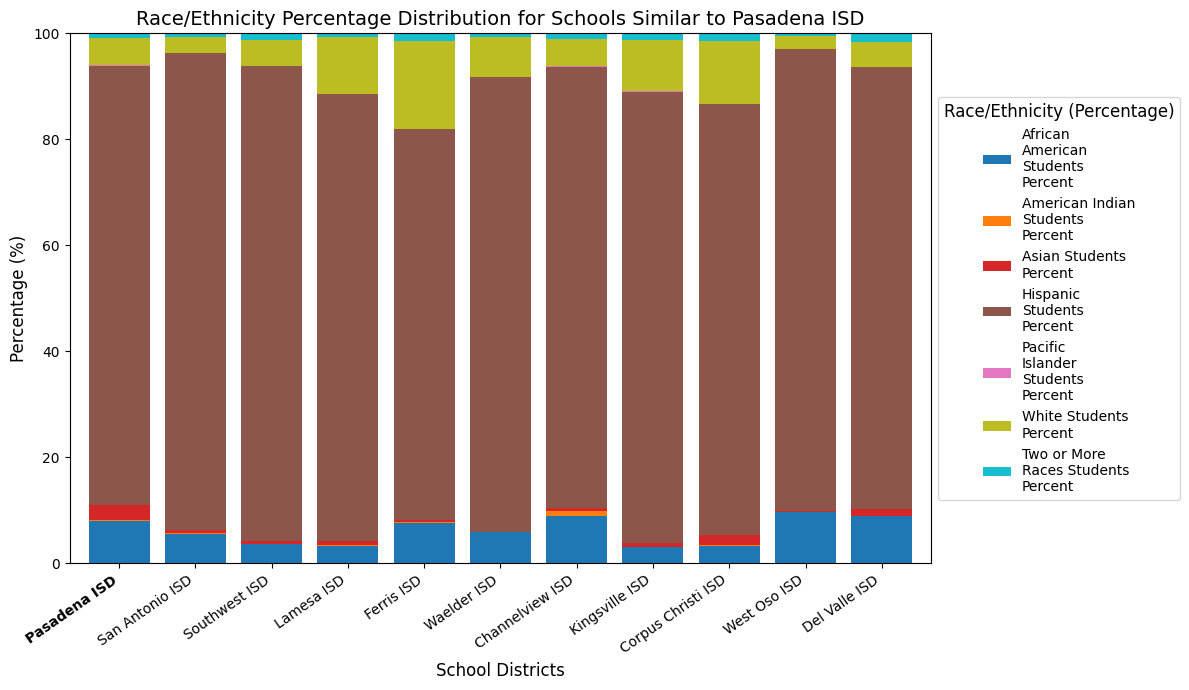

In [7]:
race_ethnicity_plot = comparePlotter(pasadenaISD, plot_func = plot_race_ethnicity_stacked_bar, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = race_ethnicity_percent)

## Special Populations

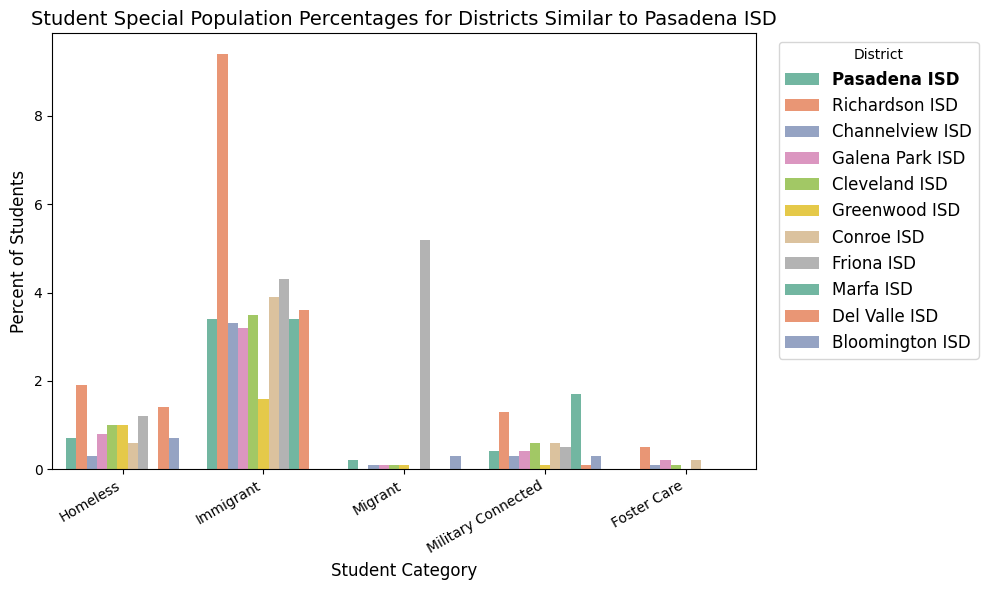

In [8]:
import matplotlib.pyplot as plt

special_populations_plot = comparePlotter(pasadenaISD, plot_func = plot_special_populations_bar, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = special_populations_percent)

## Special Education and 504

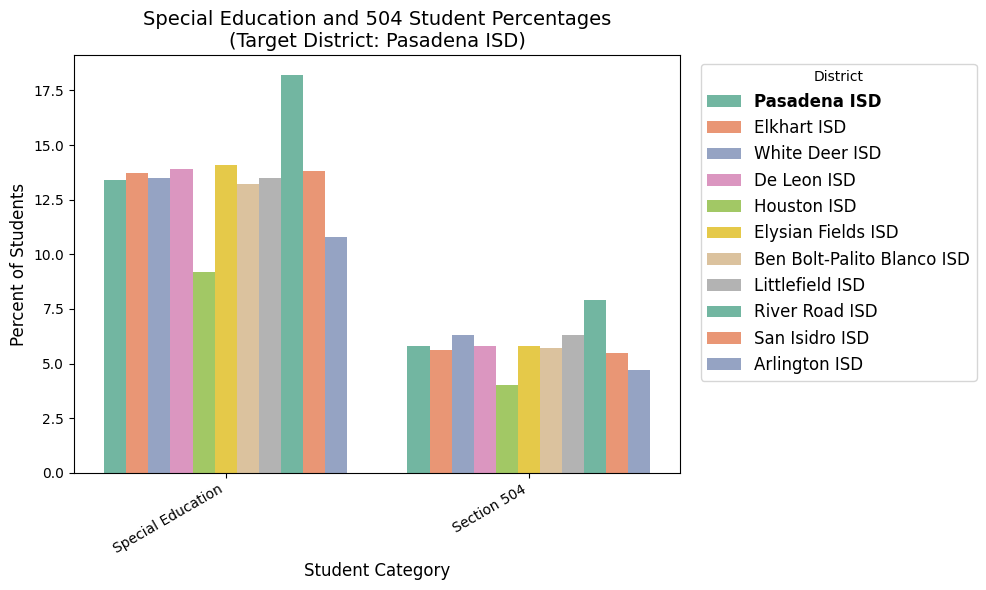

In [9]:
plot_special_ed_504_plot = comparePlotter(pasadenaISD, plot_func = plot_special_ed_504_bar, df = df, selected_features = special_ed_504)

## Gifted and Talented

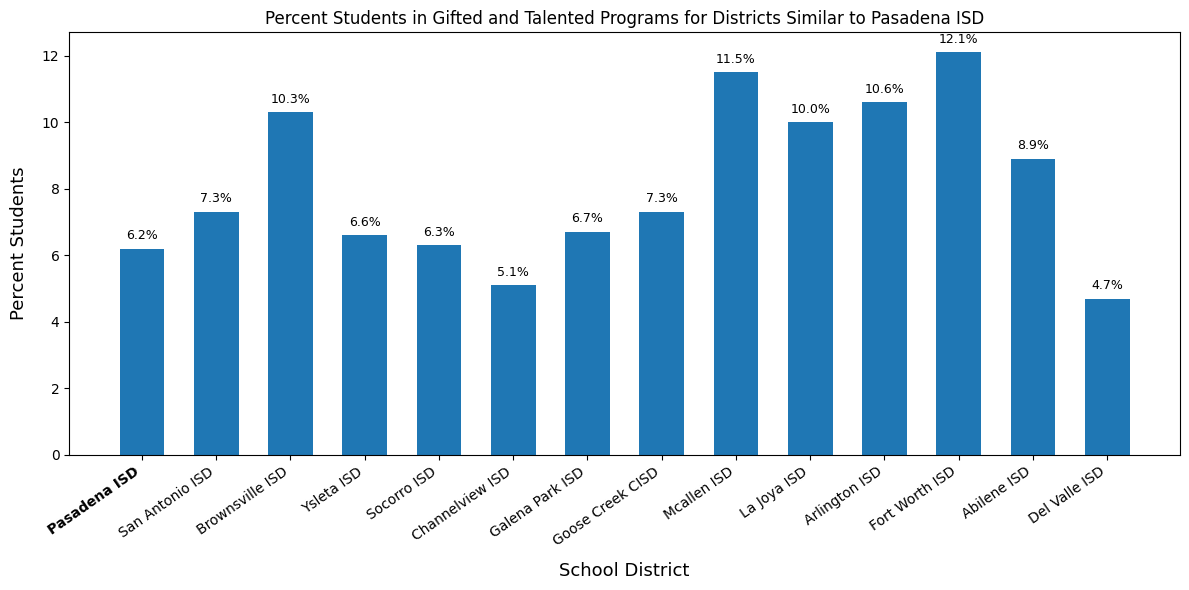

In [10]:
gifted_talented_plot = comparePlotter(pasadenaISD, plot_func = plot_gifted_talented_bars, df = df, distance_metrics = ['euclidean', 'manhattan', 'mahalanobis', 'cosine', 'canberra'], selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

## Bilingual and Language Education

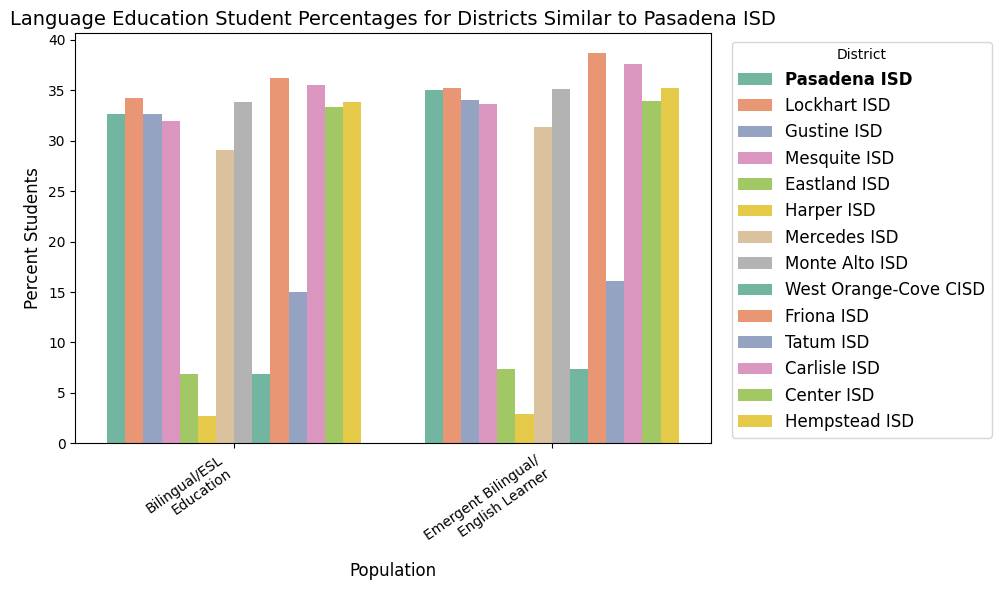

In [11]:
language_education_plot = comparePlotter(pasadenaISD, plot_func = plot_language_education_bars, df = df, selected_features = language_education_percent)

## Economically Disadvantaged

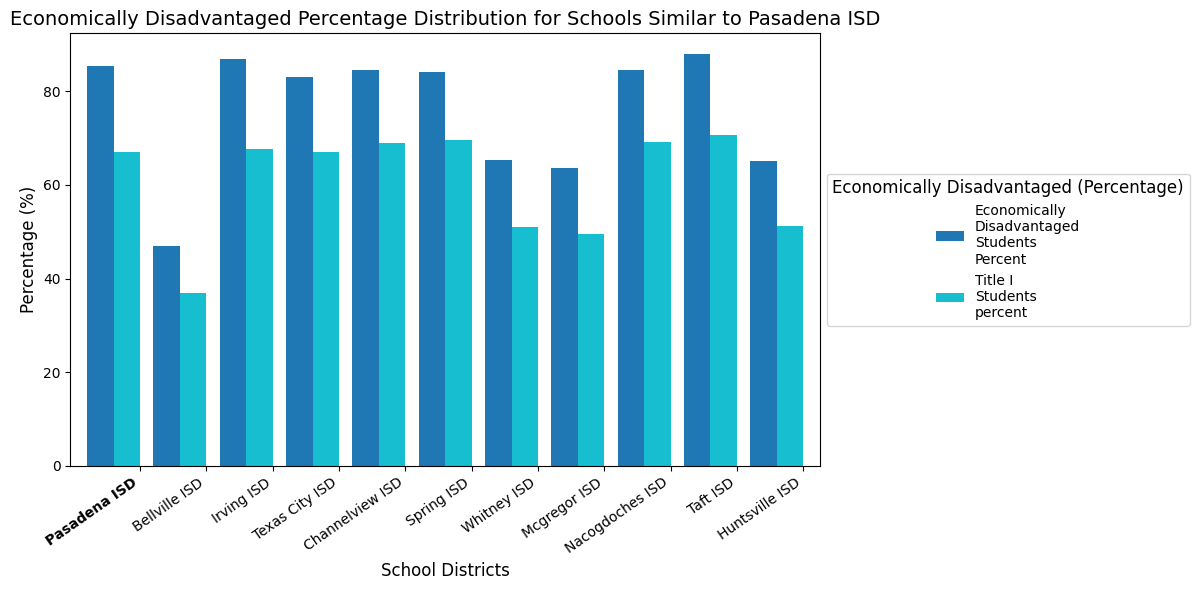

In [12]:
econ_disadv_plot = comparePlotter(pasadenaISD, plot_func = plot_economically_disadvantaged_side_by_side, df = df, selected_features = economically_disadvantaged)

# Example of Distance-Based Mechanism

In [13]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = [economically_disadvantaged[0], race_ethnicity_percent[3]])

example_data = df[df['DISTRICT_id'].isin(neighbors['DISTRICT_id'])]

example_data = example_data[['DISTNAME', 'DISTRICT_id', economically_disadvantaged[0], race_ethnicity_percent[3]]]

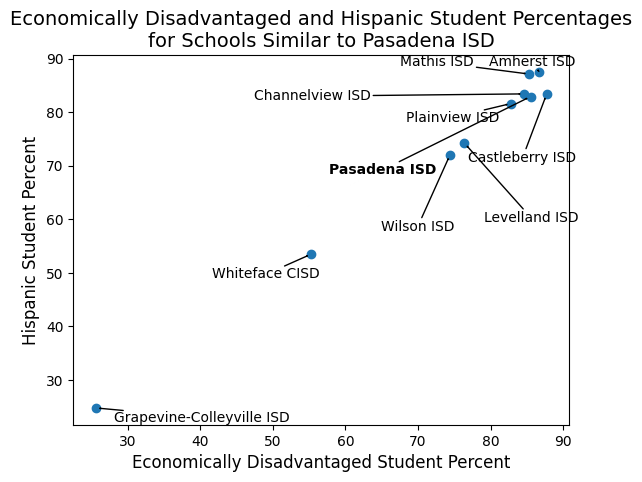

In [14]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
from KNN_Diagnostic_Plots import title_case_with_spaces

x = example_data[economically_disadvantaged[0]].reset_index(drop=True)
y = example_data[race_ethnicity_percent[3]].reset_index(drop=True)
l = [title_case_with_spaces(label) for label in example_data['DISTNAME'].reset_index(drop=True)]

fig, ax = plt.subplots()
ax.scatter(x, y)

texts = [ax.text(x[i], y[i], l[i], ha='center', va='center') for i in range(len(l))]

# Apply bold to the labels that match the condition
for text in texts:
    if 'Pasadena ISD'.lower() in text.get_text().lower():
        text.set_fontweight('bold')

adjust_text(texts, expand=(1.2, 3), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
            arrowprops=dict(arrowstyle='->', color='black') # ensure the labeling is clear by adding arrows
            );
plt.title(f"Economically Disadvantaged and Hispanic Student Percentages\nfor Schools Similar to Pasadena ISD", fontsize=14)
plt.xlabel("Economically Disadvantaged Student Percent", fontsize=12)
plt.ylabel("Hispanic Student Percent", fontsize=12)
plt.grid(False)
plt.show()


## Neighbors, All Buckets

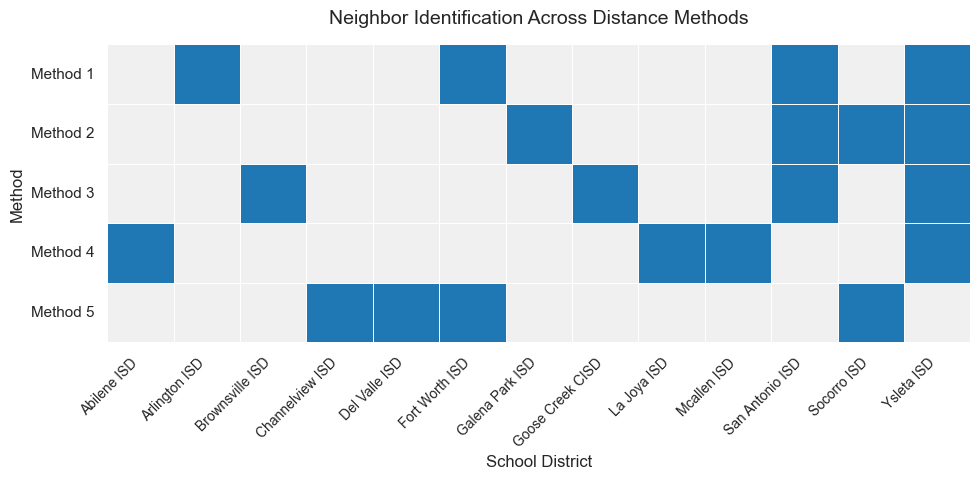

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#all buckets
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = gifted_students + race_ethnicity_percent + student_count + staff_count + economically_disadvantaged + language_education_percent + special_populations_percent + special_ed_504 + student_teacher_ratio)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Race Ethnicity

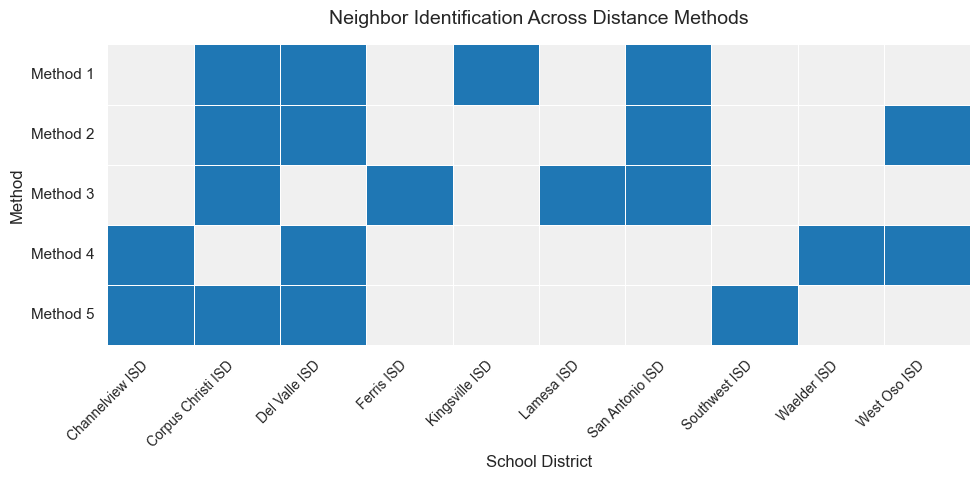

In [16]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = race_ethnicity_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Econ Disadv

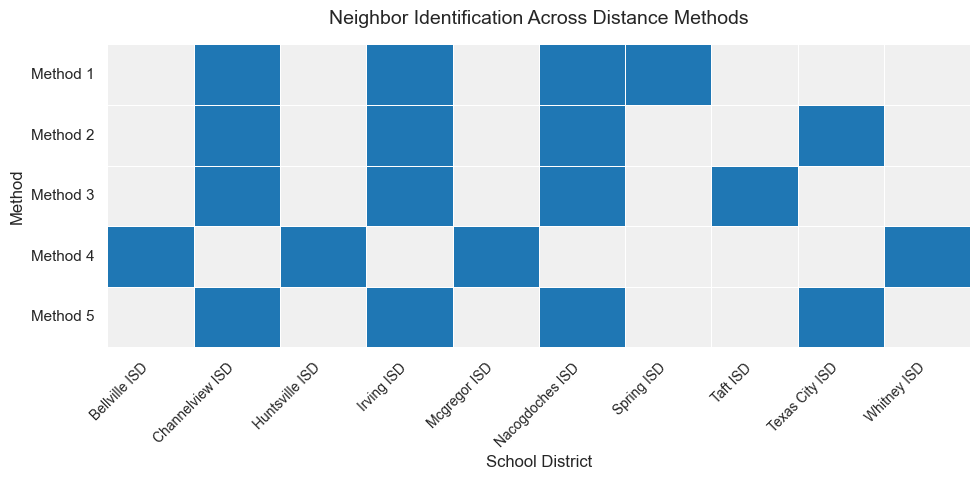

In [17]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = economically_disadvantaged)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Special Education

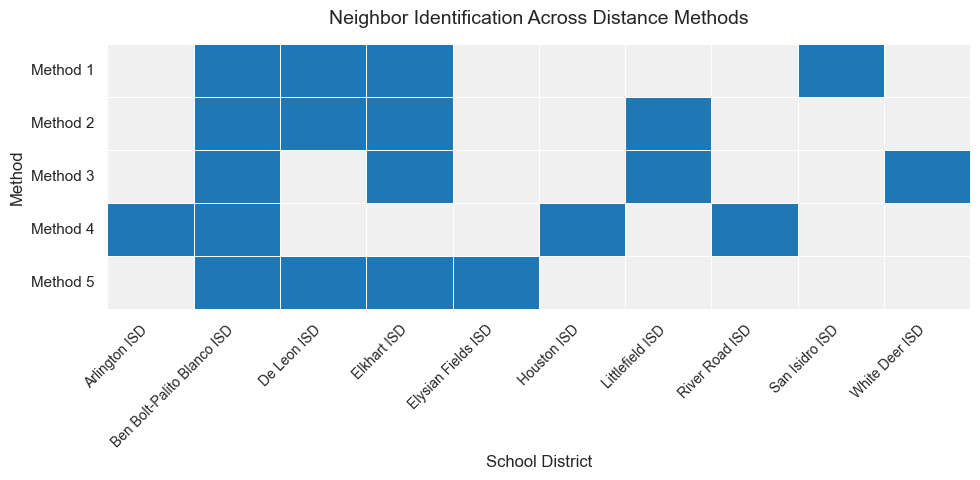

In [18]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = special_ed_504)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Special Populations

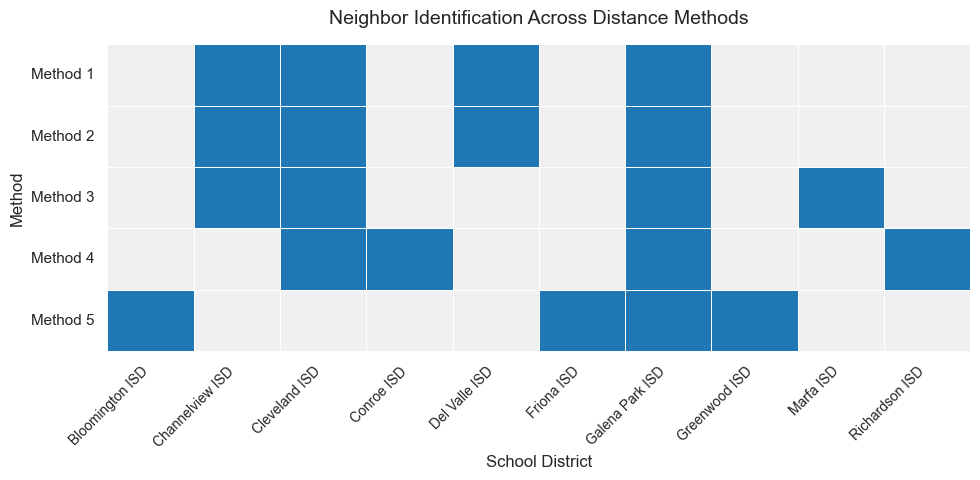

In [19]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = special_populations_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Staff Student Counts

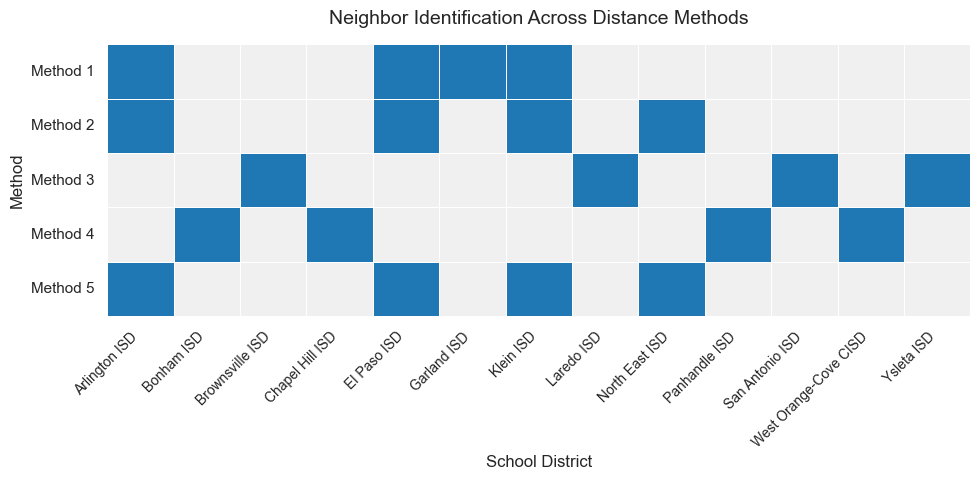

In [20]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = staff_count + student_count)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Neighbors, Language Ed

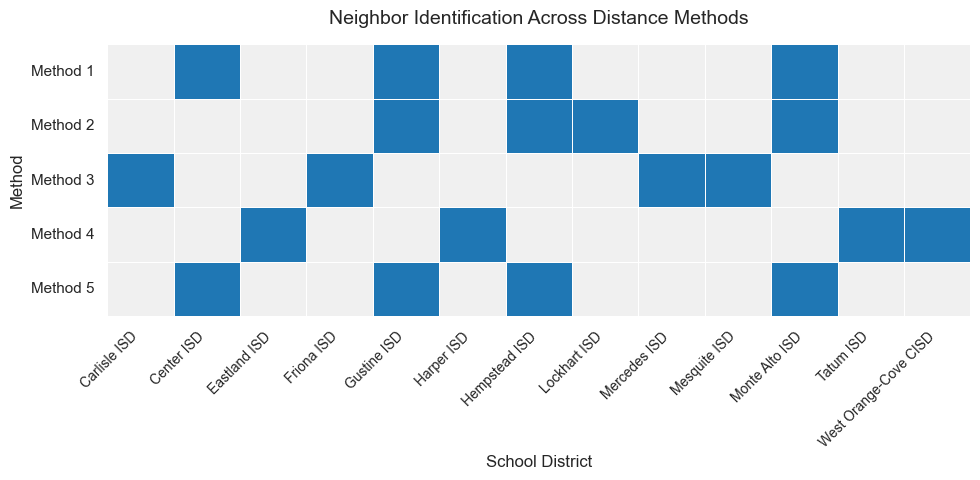

In [21]:
neighbors = compareMetrics(pasadenaISD, df = df, selected_features = language_education_percent)

neighbors = neighbors[neighbors['DISTRICT_id'] != pasadenaISD]

neighbors['DISTNAME'] = [title_case_with_spaces(dist) for dist in neighbors['DISTNAME']]

# Presence matrix
presence_matrix = (
    neighbors.drop_duplicates()
      .assign(value=1)
      .pivot_table(index="DISTNAME", columns="metric", values="value", fill_value=0)
)


# Transpose for methods on y-axis
matrix_T = presence_matrix.T

# Plot
sns.set(style="whitegrid", font_scale=1.1)

# Dynamically widen plot based on district count
n_districts = matrix_T.shape[1]
fig_width = max(10, n_districts * 0.6)  # Adjust this multiplier as needed

plt.figure(figsize=(fig_width, 5))
ax = sns.heatmap(
    matrix_T,
    cmap=sns.color_palette(["#f0f0f0", "#1f77b4"]),
    linewidths=0.7,
    linecolor="white",
    cbar=False,
    square=False
)

# Clean formatting
ax.set_title("Neighbor Identification Across Distance Methods", fontsize=14, pad=15)
ax.set_xlabel("School District", fontsize=12)
ax.set_ylabel("Method", fontsize=12)

# Rotate both axes for clarity
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [22]:
## check data
from KNN_Model import get_neighbor_data

get_neighbor_data(df, economically_disadvantaged, all_neighbors)

,DISTRICT_id,TEA District Type,TEA Description,NCES District Type,NCES Description,Charter School (Y/N),COUNTY,REGION,DISTRICT,DISTNAME_x,CNTYNAME,DFLCHART,DFLALTED,ASVAB_STATUS,District 2022-23 Economically Disadvantaged Students Percent,District 2022-23 Title I Students percent,DISTNAME_y,metric
0,15907,A,Major Urban,11,City-Large,N,'015,'20,'015907,SAN ANTONIO ISD,BEXAR,N,N,,88.5,98.6,SAN ANTONIO ISD,Method 4
1,15912,B,Major Suburban,41,Rural-Fringe,N,'015,'20,'015912,SOUTHWEST ISD,BEXAR,N,N,,81.4,100.0,SOUTHWEST ISD,Method 5
2,28903,G,Non-metropolitan Stable,32,Town-Distant,N,'028,'13,'028903,LULING ISD,CALDWELL,N,N,,79.1,100.0,LULING ISD,Method 3
3,40901,H,Rural,43,Rural-Remote,N,'040,'17,'040901,MORTON ISD,COCHRAN,N,N,,82.7,100.0,MORTON ISD,Method 3
4,57905,A,Major Urban,11,City-Large,N,'057,'10,'057905,DALLAS ISD,DALLAS,N,N,,84.9,96.7,DALLAS ISD,Method 5
5,70905,D,Other Central City Suburban,41,Rural-Fringe,N,'070,'10,'070905,FERRIS ISD,ELLIS,N,N,,80.8,99.9,FERRIS ISD,Method 1
6,70905,D,Other Central City Suburban,41,Rural-Fringe,N,'070,'10,'070905,FERRIS ISD,ELLIS,N,N,,80.8,99.9,FERRIS ISD,Method 2
7,70905,D,Other Central City Suburban,41,Rural-Fringe,N,'070,'10,'070905,FERRIS ISD,ELLIS,N,N,,80.8,99.9,FERRIS ISD,Method 3
8,95905,E,Independent Town,33,Town-Remote,N,'095,'17,'095905,PLAINVIEW ISD,HALE,N,N,,82.8,100.0,PLAINVIEW ISD,Method 1
9,101905,B,Major Suburban,21,Suburb-Large,N,'101,'04,'101905,CHANNELVIEW ISD,HARRIS,N,N,,84.6,68.9,CHANNELVIEW ISD,Method 4
